In [3]:
%pip install matplotlib xgboost graphviz

import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Note: you may need to restart the kernel to use updated packages.


# 8회차 과제
목표: Random forest 기반 모델과 XGBoost 기반 모델 만들기  
(수업 자료의 `과제 연계 실습` 참고)

## 와인 분류하기

다음은 와인과 관련한 여러 정보와 종류가 담긴 데이터이다. Random forest와 XGBoost를 사용하여 종류('target')를 예측하되, 최소 90%의 정확도를 달성하시오.  
또한, 각 특성의 중요도도 함께 나타내시오. (*8:2 분리*)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Random Forest: 0.9444444444444444
XGBoost: 0.9444444444444444
Random Forest 중요도: [0.14061698 0.07924482 0.03767072 0.07632187 0.06799209 0.19873592
 0.21931515 0.18010245]


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

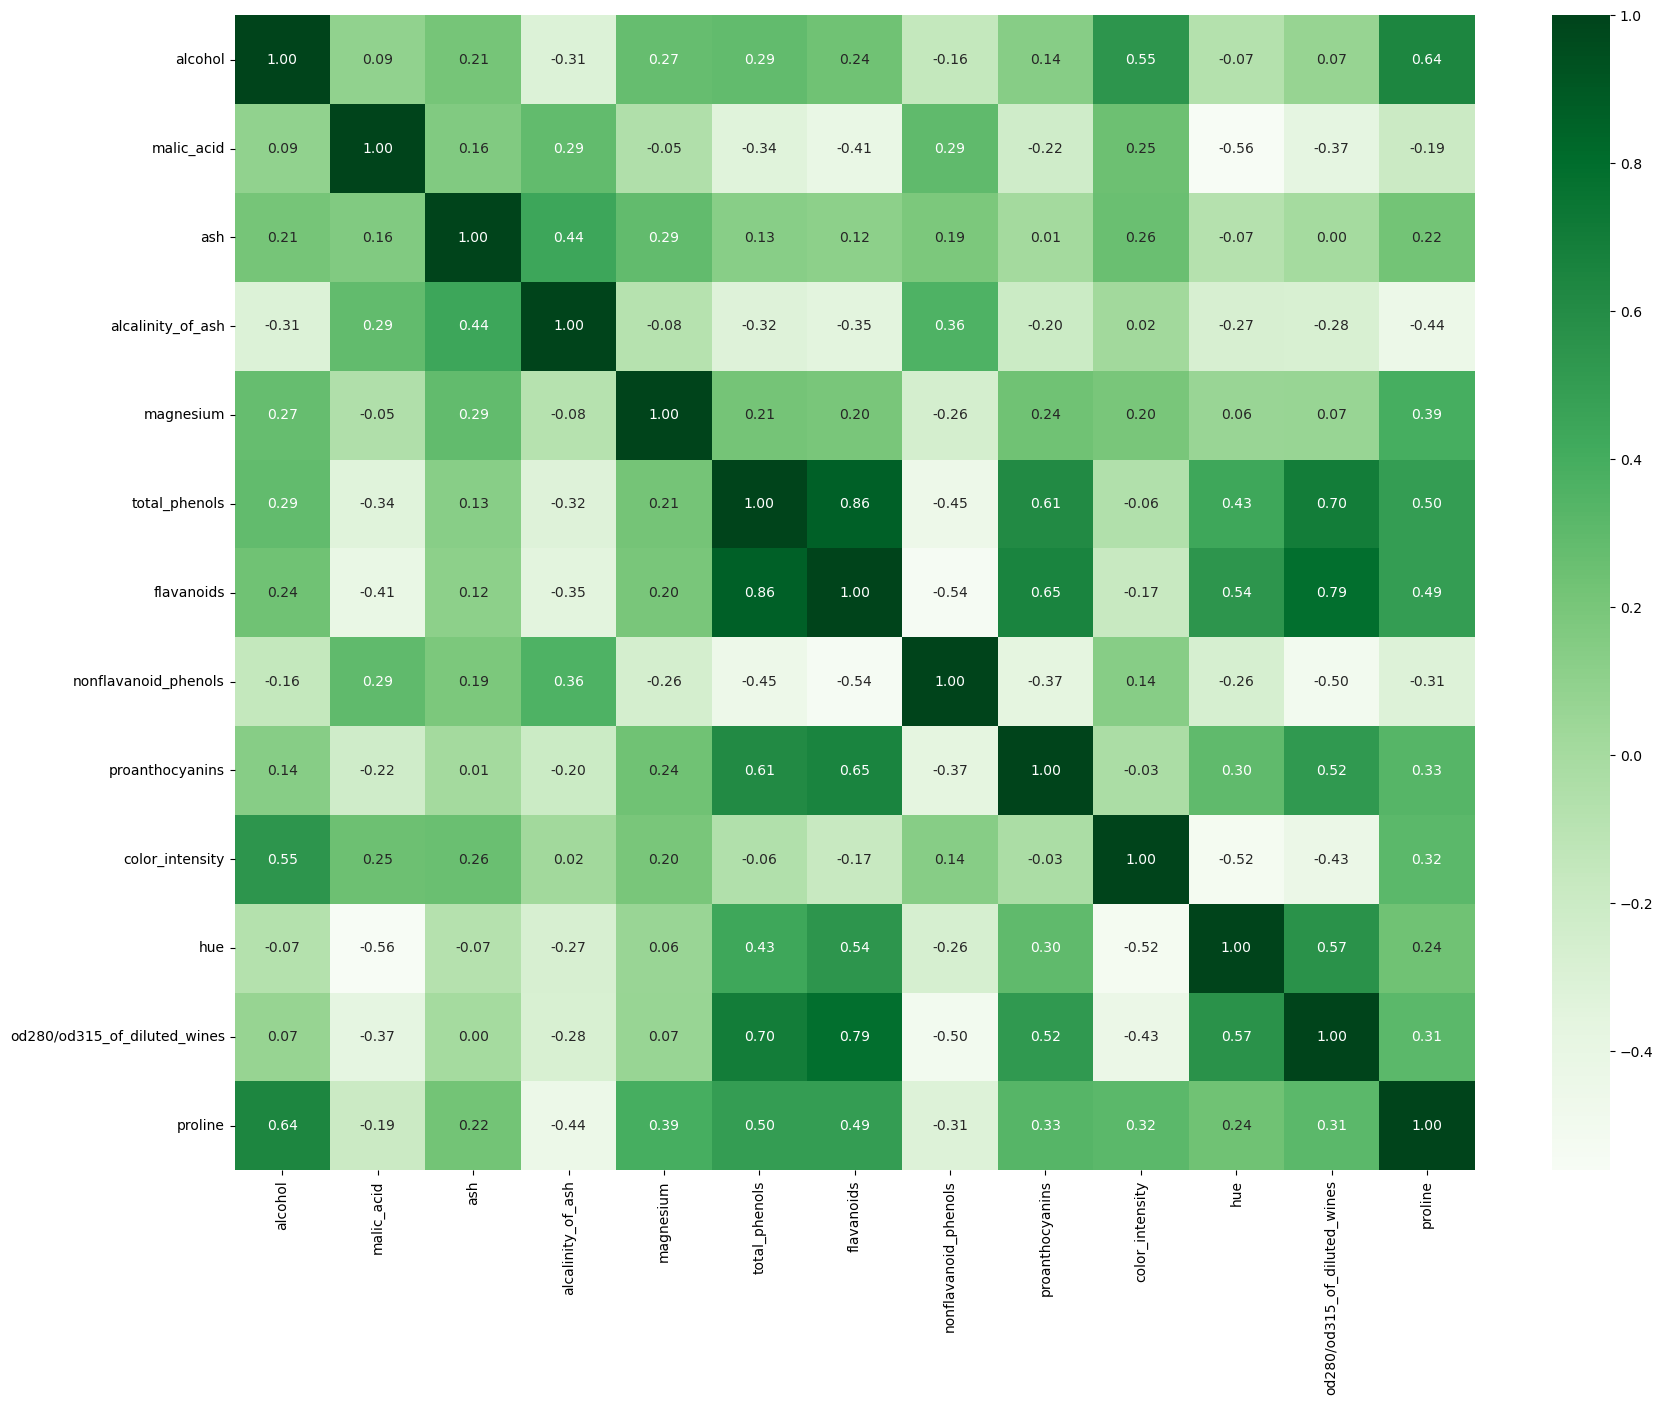

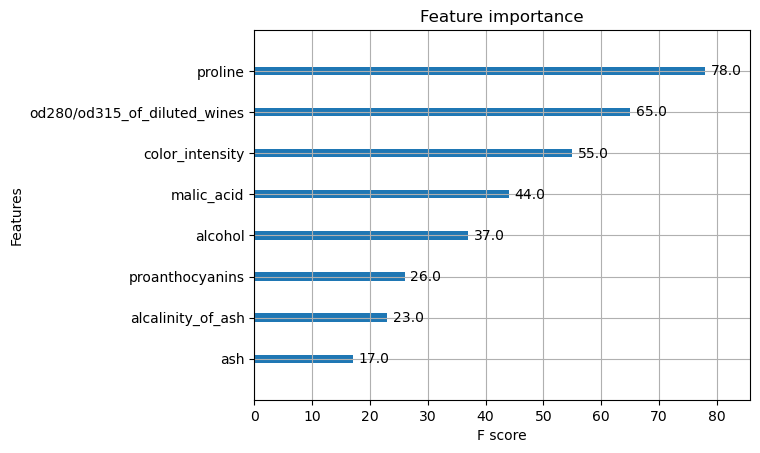

In [21]:
raw_wine = datasets.load_wine(as_frame=True)
wine = raw_wine.frame

wine.head()
print(raw_wine.feature_names)

new_columns_names = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

corr = wine[new_columns_names].corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Greens")

final_column = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',  'proanthocyanins', 
                'color_intensity', 'od280/od315_of_diluted_wines', 'proline']

train, test = train_test_split(wine, test_size=.2, random_state=2)
train_X = train[final_column]
train_Y = train["target"]

test_X = test[final_column]
test_Y = test["target"]


rf_classifier = RandomForestClassifier()
rf_classifier.fit(train_X, train_Y)

rf_accuracy = rf_classifier.score(test_X, test_Y)

print(f"Random Forest: {rf_accuracy}")

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(train_X, train_Y)

xgb_accuracy = xgb_classifier.score(test_X, test_Y)

print(f"XGBoost: {xgb_accuracy}")

print(f"Random Forest 중요도: {rf_classifier.feature_importances_}")

xgb.plot_importance(xgb_classifier)